### Initial Data Loading and Cleaning

In [5]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [6]:
#opening pickle file of augmented added data
with open('../data/external/combined_augmented_data_v2.pkl','rb') as f:
    X_train,y_train,X_test,y_test = pickle.load(f)

In [7]:
#printing shapes 
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')


X_train Shape: (109820, 28, 28)
y_train Shape: (109820,)
X_test Shape: (28688, 28, 28)
y_test Shape: (28688,)


In [8]:
#define image resolution 
res = (28,28)

The training dataset consists of 27455 28x28 pixel grayscale images, including the associated label, as well as an additional 27455 28x28 augmented images, using the keras.preprocessing.image.ImageDataGenerator function. This is meant to increase the diversity of the data to prevent overfitting found in the original dataset. The testing dataset consists of 7172 28x28 images and 7172 28x28 augmented images. The label and pixels are split into X and y for both training and testing data. 

The below is a function to find the indices of a specified label. 

In [9]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')
        

Creating a dictionary where key is the numeric label in the dataset and value is the corresponding letter. 

In [10]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(list(np.unique(y_train.astype(int))))
#dictionary of labels 
labels = dict(zip(numbers,letters))

In [11]:
X_train[0].shape

(28, 28)

Inspecting examples for each letter in the dataset. 

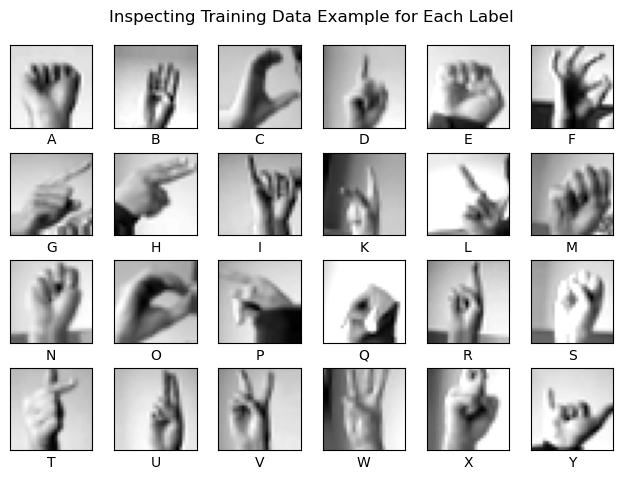

In [12]:
#visualization of dataset 
fig, ax = plt.subplots(4,6)
fig.suptitle('Inspecting Training Data Example for Each Label')
ax = ax.ravel()
pos = 0 

#loop through each label in dataset 
for label in range(0,26):
    #if label is not included in dataset 
    if label in [9,25]:
        continue
    #find first index of label
    idx = find_indices(y_train,label)[0][0]
    #display first found image 
    ax[pos].imshow(X_train[idx],cmap='gray')
    #set x label as dataset label
    ax[pos].set(xlabel=labels[label])
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

Looking at specific letters

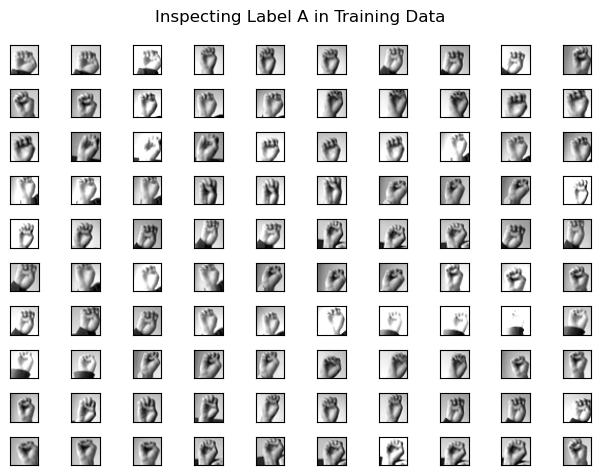

In [13]:
#visualization of dataset 
fig, ax = plt.subplots(10,10)
plt.suptitle('Inspecting Label A in Training Data')
ax = ax.ravel()
pos = 0 

label = 4

index = find_indices(y_train,label)[0]

#loop through each label in dataset 
for i, idx in enumerate(index):
    if i >= 100:
        break
    #display first found image 
    ax[pos].imshow(X_train[idx],cmap='gray')
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

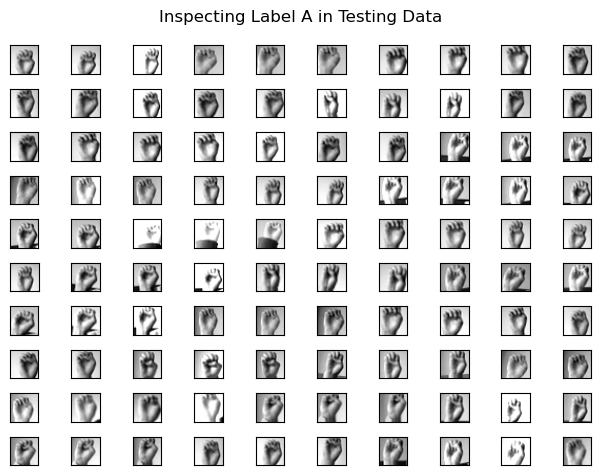

In [14]:
#visualization of dataset 
fix, ax = plt.subplots(10,10)
plt.suptitle('Inspecting Label A in Testing Data')
ax = ax.ravel()
pos = 0 

label = 4

index = find_indices(y_test,label)[0]

#loop through each label in dataset 
for i, idx in enumerate(index):
    if i >= 100:
        break
    #display first found image 
    ax[pos].imshow(X_test[idx],cmap='gray')
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

No additional data loading and cleaning steps required for this dataset. 